<a href="https://colab.research.google.com/github/theAkhileshRai/DeepLearning/blob/master/TFClassifier-Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
!pip install tensorflow==1.3.0

In [0]:
import pandas as pd
import tensorflow as tf

In [0]:
diabetes = pd.read_csv('/content/diabetes.csv')

In [22]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [0]:
cols_to_norm = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction']

In [0]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x :(x-x.min())/(x.max() - x.min()))

In [26]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1


In [0]:
Pregnancies = tf.feature_column.numeric_column('Pregnancies')
Glucose = tf.feature_column.numeric_column('Glucose')
BloodPressure = tf.feature_column.numeric_column('BloodPressure')
SkinThickness = tf.feature_column.numeric_column('SkinThickness')
Insulin = tf.feature_column.numeric_column('Insulin')
BMI = tf.feature_column.numeric_column('BMI')
DiabetesPedigreeFunction = tf.feature_column.numeric_column('DiabetesPedigreeFunction')
Age = tf.feature_column.numeric_column('Age')

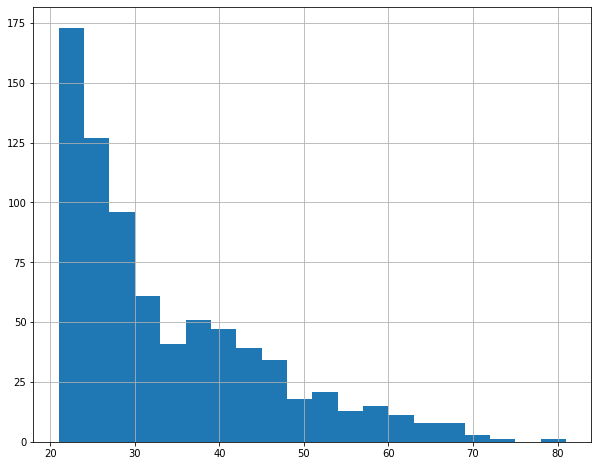

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=[10,8],edgecolor='black')
diabetes['Age'].hist(bins=20)
plt.show()

In [34]:
age_bucket = tf.feature_column.bucketized_column(Age,boundaries=[20,30,40,50,60,70,80])
age_bucket

_BucketizedColumn(source_column=_NumericColumn(key='Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(20, 30, 40, 50, 60, 70, 80))

In [0]:
feat_cols = [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, age_bucket]

In [40]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1


In [41]:
x_data = diabetes.drop('Outcome',axis=1)
x_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33


In [42]:
label = diabetes['Outcome']
label.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_data,label,test_size = 0.3,random_state= 42)

In [0]:
input_func = tf.estimator.inputs.pandas_input_fn(x = x_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [46]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp44utptnd', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}


In [47]:
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmp44utptnd/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 411.23
INFO:tensorflow:loss = 7.4180965, step = 101 (0.247 sec)
INFO:tensorflow:global_step/sec: 548.686
INFO:tensorflow:loss = 5.7838287, step = 201 (0.187 sec)
INFO:tensorflow:global_step/sec: 470.45
INFO:tensorflow:loss = 5.8196697, step = 301 (0.207 sec)
INFO:tensorflow:global_step/sec: 488.229
INFO:tensorflow:loss = 4.7100105, step = 401 (0.205 sec)
INFO:tensorflow:global_step/sec: 465.68
INFO:tensorflow:loss = 4.9285874, step = 501 (0.213 sec)
INFO:tensorflow:global_step/sec: 428.996
INFO:tensorflow:loss = 6.0676794, step = 601 (0.234 sec)
INFO:tensorflow:global_step/sec: 440.122
INFO:tensorflow:loss = 4.592932, step = 701 (0.226 sec)
INFO:tensorflow:global_step/sec: 444.672
INFO:tensorflow:loss = 4.3684335, step = 801 (0.226 sec)
INFO:tensorflow:global_step/sec: 466.744
INFO:tensorflow:lo

In [0]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x = x_test,y=y_test,shuffle=False)

In [50]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2020-04-26-19:39:51
INFO:tensorflow:Restoring parameters from /tmp/tmp44utptnd/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2020-04-26-19:39:52
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74025977, accuracy_baseline = 0.6536796, auc = 0.7693295, auc_precision_recall = 0.6005091, average_loss = 0.5469981, global_step = 1000, label/mean = 0.34632036, loss = 63.178276, prediction/mean = 0.37504816


In [51]:
results

{'accuracy': 0.74025977,
 'accuracy_baseline': 0.6536796,
 'auc': 0.7693295,
 'auc_precision_recall': 0.6005091,
 'average_loss': 0.5469981,
 'global_step': 1000,
 'label/mean': 0.34632036,
 'loss': 63.178276,
 'prediction/mean': 0.37504816}

In [0]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=x_test,shuffle=False)

In [0]:
predictions = model.predict(pred_input_func)

In [57]:
list(predictions)

INFO:tensorflow:Restoring parameters from /tmp/tmp44utptnd/model.ckpt-1000


[{'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.590628], dtype=float32),
  'logits': array([0.36656213], dtype=float32),
  'probabilities': array([0.409372, 0.590628], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.17685828], dtype=float32),
  'logits': array([-1.5377797], dtype=float32),
  'probabilities': array([0.82314175, 0.17685828], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.16312052], dtype=float32),
  'logits': array([-1.6351907], dtype=float32),
  'probabilities': array([0.8368795 , 0.16312052], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.3762967], dtype=float32),
  'logits': array([-0.50529677], dtype=float32),
  'probabilities': array([0.62370324, 0.3762967 ], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array([b'1'], dtype=object